In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from gensim import utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

C:\Users\88015\Anaconda3\envs\thesis\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv("train.csv")
print (df.shape)
print (df.count())
#print(df.Pclass)

(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


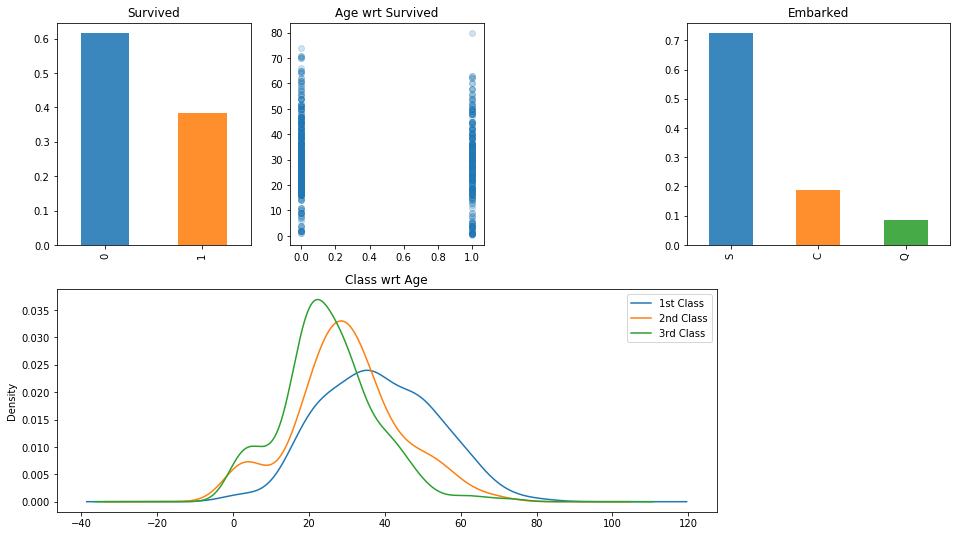

In [3]:
fig = plt.figure(figsize = (16,9))
plt.subplot2grid((2,4), (0,0))
df.Survived.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Survived")

plt.subplot2grid((2,4), (0,1))
plt.scatter(df.Survived, df.Age, alpha = 0.2)
plt.title("Age wrt Survived")

plt.subplot2grid((2,4), (0,2))
df.Pclass.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Class")

plt.subplot2grid((2,4), (1,0), colspan=3)
#X = [1,2,3]
for x in [1]:
    df.Age[df.Pclass == x].plot(kind = "kde", label ="1st Class")
    
for x in [2]:
    df.Age[df.Pclass == x].plot(kind = "kde", label ="2nd Class")

for x in [3]:
    df.Age[df.Pclass == x].plot(kind = "kde", label ="3rd Class")    

plt.title("Class wrt Age")
plt.legend()

plt.subplot2grid((2,3), (0,2))
df.Embarked.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Embarked")


plt.show()

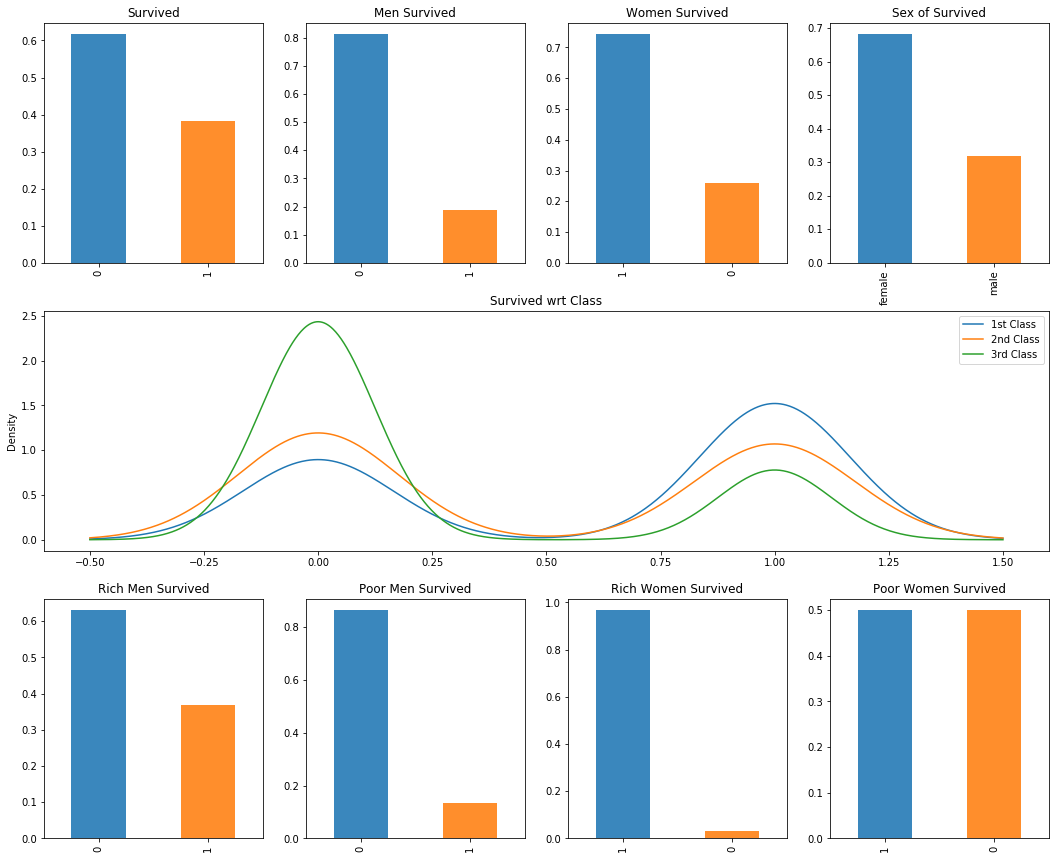

In [4]:
fig = plt.figure(figsize = (18,15))
plt.subplot2grid((3,4), (0,0))
df.Survived.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Survived")

plt.subplot2grid((3,4), (0,1))
df.Survived[df.Sex == 'male'].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Men Survived")

plt.subplot2grid((3,4), (0,2))
df.Survived[df.Sex == 'female'].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Women Survived")

plt.subplot2grid((3,4), (0,3))
df.Sex[df.Survived == 1].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Sex of Survived")

#fig = plt.figure(figsize = (16,9))
plt.subplot2grid((3,4), (1,0), colspan = 4)
for x in [1]:
    df.Survived[df.Pclass == x].plot(kind = "kde", label ="1st Class")
    
for x in [2]:
    df.Survived[df.Pclass == x].plot(kind = "kde", label ="2nd Class")

for x in [3]:
    df.Survived[df.Pclass == x].plot(kind = "kde", label ="3rd Class")    


plt.title("Survived wrt Class")    
plt.legend()  

plt.subplot2grid((3,4), (2,0))
df.Survived[(df.Sex == 'male') & (df.Pclass ==1)].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Rich Men Survived")

plt.subplot2grid((3,4), (2,1))
df.Survived[(df.Sex == 'male') & (df.Pclass ==3)].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Poor Men Survived")

plt.subplot2grid((3,4), (2,2))
df.Survived[(df.Sex == 'female') & (df.Pclass ==1)].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Rich Women Survived")

plt.subplot2grid((3,4), (2,3))
df.Survived[(df.Sex == 'female') & (df.Pclass ==3)].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.88)
plt.title("Poor Women Survived")

plt.show()

In [5]:
#training
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#print(train.head())

train["Hyp"] = 0
train.loc[train.Sex == 'female', 'Hyp'] = 1
train["Result"] = 0
target = train["Survived"]
train.loc[train.Survived == train['Hyp'], 'Result'] = 1

print(train['Result'].value_counts())

print(train['Result'].value_counts(normalize = True))



1    701
0    190
Name: Result, dtype: int64
1    0.786756
0    0.213244
Name: Result, dtype: float64


In [7]:
def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data['Fare'].dropna().median())
    data["Age"] = data["Age"].fillna(data['Age'].dropna().median())
    
    data.loc[data['Sex'] == 'male', 'Sex'] = 0
    data.loc[data['Sex'] == 'female', 'Sex'] = 1
    
    data['Embarked'] = data['Embarked'].fillna('S')
    data.loc[data['Embarked'] == 'S', 'Embarked'] = 0
    data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
    data.loc[data['Embarked'] == 'Q', 'Embarked'] = 2

In [8]:
clean_data(train)

In [10]:
target = train["Survived"].values

In [11]:
names = ["Pclass", "Age", "Fare", "Embarked", "Sex", "SibSp", "Parch"]
features = train[names].values

In [12]:
DecisionTree_classifier = DecisionTreeClassifier(random_state=1)



DecisionTree_classifier.fit(features, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [30]:
clean_data(test)

In [31]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin           91
Embarked       418
dtype: int64

In [33]:
DecisionTree_classifier.score(features, target)

0.97979797979797978